#### Model Structure

In [1]:
from keras import layers, models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

model.summary()

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv


----
#### Compiling Model

In [2]:
from keras import losses, optimizers

model.compile(
    loss=losses.binary_crossentropy,
    optimizer=optimizers.RMSprop(lr=0.0001),
    metrics=["acc"]
)


----
#### Creating Generators for Dataset

In [4]:
from keras.preprocessing.image import ImageDataGenerator
import os

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    os.path.join(os.getcwd(), "dataset/train"),
    target_size=(150, 150),
    batch_size=20,
    class_mode="binary"
)

validation_generator = test_datagen.flow_from_directory(
    os.path.join(os.getcwd(), "dataset/validation"),
    target_size=(150, 150),
    batch_size=20,
    class_mode="binary"
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.



----
#### Fitting Models Using a Fit-Generator

In [5]:
import datetime

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)
model.save("models/cats_vs_dogs_{}.h5".format(datetime.datetime.utcnow().strftime("%Y-%m-%d_%H%M%S")))

Instructions for updating:
Use tf.cast instead.
Epoch 1/30
100/100 [==============================] - 109s 1s/step - loss: 0.6869 - acc: 0.5365 - val_loss: 0.6654 - val_acc: 0.6190
Epoch 2/30
100/100 [==============================] - 17s 167ms/step - loss: 0.6456 - acc: 0.6315 - val_loss: 0.6260 - val_acc: 0.6500
Epoch 3/30
100/100 [==============================] - 16s 164ms/step - loss: 0.5987 - acc: 0.6720 - val_loss: 0.6200 - val_acc: 0.6540
Epoch 4/30
100/100 [==============================] - 16s 165ms/step - loss: 0.5654 - acc: 0.7045 - val_loss: 0.5978 - val_acc: 0.6710
Epoch 5/30
100/100 [==============================] - 16s 164ms/step - loss: 0.5365 - acc: 0.7290 - val_loss: 0.5768 - val_acc: 0.6850
Epoch 6/30
100/100 [==============================] - 16s 164ms/step - loss: 0.5051 - acc: 0.7515 - val_loss: 0.6167 - val_acc: 0.6730
Epoch 7/30
100/100 [==============================] - 16s 163ms/step - loss: 0.4834 - acc: 0.7655 - val_loss: 0.5504 - val_acc: 0.7150
Epoch 8/3


----
#### Plotting Loss & Accuracy

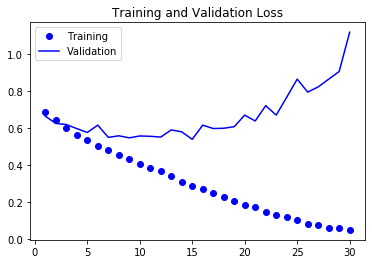

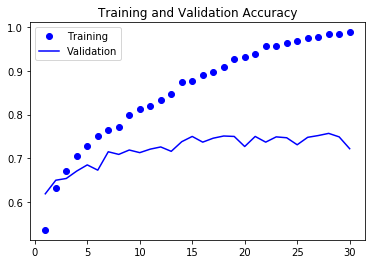

In [9]:
import matplotlib.pyplot as plt

epochs = range(1, len(history.history["acc"])+1)

plt.plot(epochs, history.history["loss"], "bo", label="Training")
plt.plot(epochs, history.history["val_loss"], "b", label="Validation")
plt.title("Training and Validation Loss")
plt.legend()

plt.savefig("../../docs/notes/img/convnetFromScratch_Loss.png")
plt.figure()

plt.plot(epochs, history.history["acc"], "bo", label="Training")
plt.plot(epochs, history.history["val_acc"], "b", label="Validation")
plt.title("Training and Validation Accuracy")
plt.legend()

plt.savefig("../../docs/notes/img/convnetFromScratch_Accuracy.png")
plt.show()